In [127]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Import Data

In [2]:
data = pd.read_csv('train.csv')
data = data.drop('Id', axis = 1)
data_copy = data.copy(deep = True)

In [3]:
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


# EDA

## Data Information

In [4]:
data.shape

(15120, 55)

In [5]:
data.info()
#There is no missing data, great!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 55 columns):
Elevation                             15120 non-null int64
Aspect                                15120 non-null int64
Slope                                 15120 non-null int64
Horizontal_Distance_To_Hydrology      15120 non-null int64
Vertical_Distance_To_Hydrology        15120 non-null int64
Horizontal_Distance_To_Roadways       15120 non-null int64
Hillshade_9am                         15120 non-null int64
Hillshade_Noon                        15120 non-null int64
Hillshade_3pm                         15120 non-null int64
Horizontal_Distance_To_Fire_Points    15120 non-null int64
Wilderness_Area1                      15120 non-null int64
Wilderness_Area2                      15120 non-null int64
Wilderness_Area3                      15120 non-null int64
Wilderness_Area4                      15120 non-null int64
Soil_Type1                            15120 non-null int64
Soil_T

In [6]:
data.skew()

Elevation                               0.075640
Aspect                                  0.450935
Slope                                   0.523658
Horizontal_Distance_To_Hydrology        1.488052
Vertical_Distance_To_Hydrology          1.537776
Horizontal_Distance_To_Roadways         1.247811
Hillshade_9am                          -1.093681
Hillshade_Noon                         -0.953232
Hillshade_3pm                          -0.340827
Horizontal_Distance_To_Fire_Points      1.617099
Wilderness_Area1                        1.231244
Wilderness_Area2                        5.228781
Wilderness_Area3                        0.324594
Wilderness_Area4                        0.825798
Soil_Type1                              6.294716
Soil_Type2                              4.617019
Soil_Type3                              3.575995
Soil_Type4                              3.872721
Soil_Type5                              9.416209
Soil_Type6                              4.506716
Soil_Type7          

In [153]:
data.corr()['Cover_Type']

Elevation                             0.016090
Aspect                                0.008015
Slope                                 0.087722
Horizontal_Distance_To_Hydrology     -0.010515
Vertical_Distance_To_Hydrology        0.075647
Horizontal_Distance_To_Roadways      -0.105662
Hillshade_9am                        -0.010286
Hillshade_Noon                       -0.098905
Hillshade_3pm                        -0.053399
Horizontal_Distance_To_Fire_Points   -0.089389
Wilderness_Area1                     -0.230117
Wilderness_Area2                      0.014994
Wilderness_Area3                      0.122146
Wilderness_Area4                      0.075774
Soil_Type1                            0.015069
Soil_Type2                            0.022627
Soil_Type3                           -0.016393
Soil_Type4                           -0.027816
Soil_Type5                            0.027692
Soil_Type6                            0.006521
Soil_Type7                                 NaN
Soil_Type8   

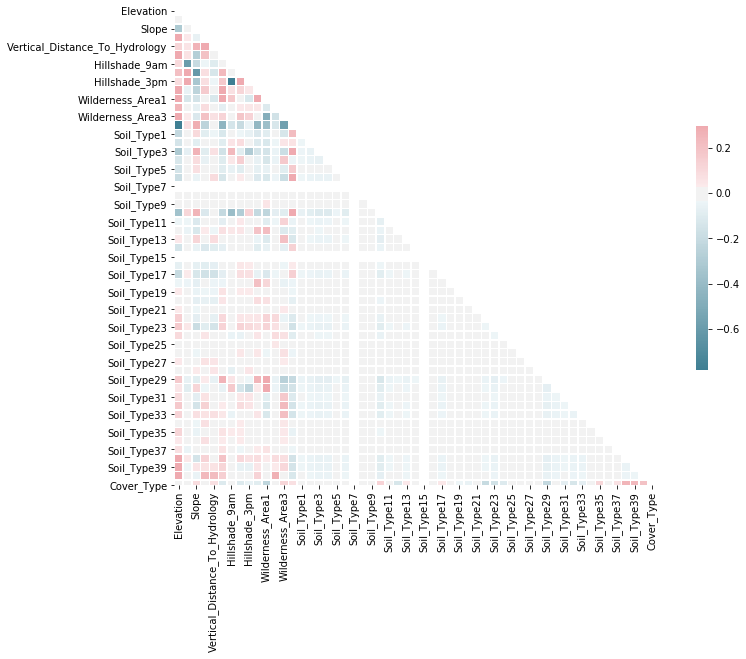

In [154]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Visualization

### Elevation

In [31]:
data['Elevation'].describe()

count    15120.000000
mean      2749.322553
std        417.678187
min       1863.000000
25%       2376.000000
50%       2752.000000
75%       3104.000000
max       3849.000000
Name: Elevation, dtype: float64

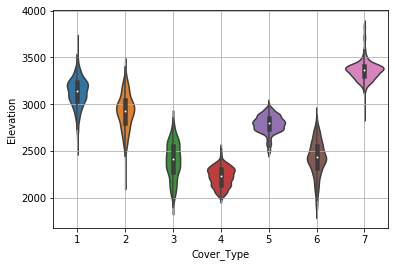

In [7]:
sns.violinplot(x = data['Cover_Type'], y = data['Elevation'])
plt.grid()

### Aspect

In [32]:
data['Aspect'].describe()

count    15120.000000
mean       156.676653
std        110.085801
min          0.000000
25%         65.000000
50%        126.000000
75%        261.000000
max        360.000000
Name: Aspect, dtype: float64

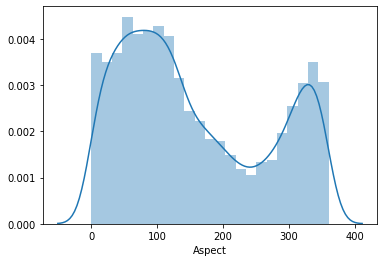

In [8]:
sns.distplot(data['Aspect'])

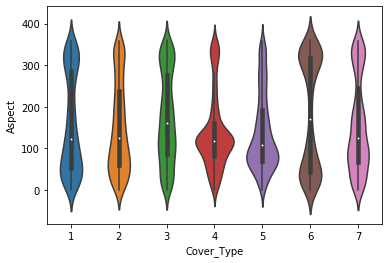

In [9]:
sns.violinplot(x = data['Cover_Type'], y = data['Aspect'])

### Slope

In [35]:
data['Slope'].describe()

count    15120.000000
mean        16.501587
std          8.453927
min          0.000000
25%         10.000000
50%         15.000000
75%         22.000000
max         52.000000
Name: Slope, dtype: float64

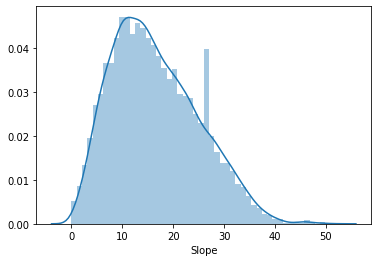

In [10]:
sns.distplot(data['Slope'])

### Horizontal/Vertical Distance to Hydrology

In [36]:
data.Horizontal_Distance_To_Hydrology.describe()

count    15120.000000
mean       227.195701
std        210.075296
min          0.000000
25%         67.000000
50%        180.000000
75%        330.000000
max       1343.000000
Name: Horizontal_Distance_To_Hydrology, dtype: float64

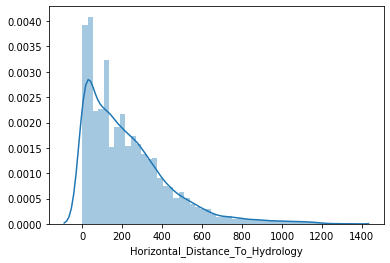

In [11]:
sns.distplot(data.Horizontal_Distance_To_Hydrology)

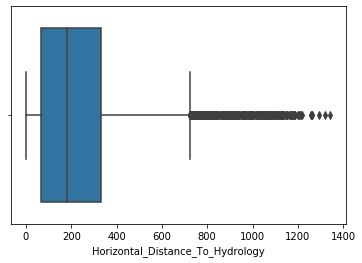

In [12]:
sns.boxplot(data.Horizontal_Distance_To_Hydrology)

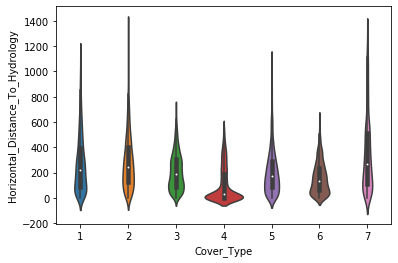

In [13]:
sns.violinplot(x = data['Cover_Type'], y = data.Horizontal_Distance_To_Hydrology)

In [37]:
data.Vertical_Distance_To_Hydrology.describe()

count    15120.000000
mean        51.076521
std         61.239406
min       -146.000000
25%          5.000000
50%         32.000000
75%         79.000000
max        554.000000
Name: Vertical_Distance_To_Hydrology, dtype: float64

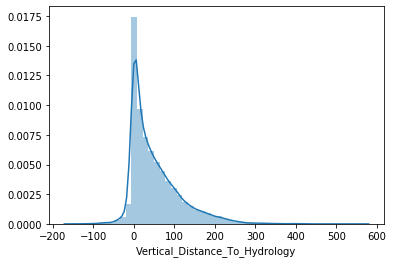

In [14]:
sns.distplot(data.Vertical_Distance_To_Hydrology)

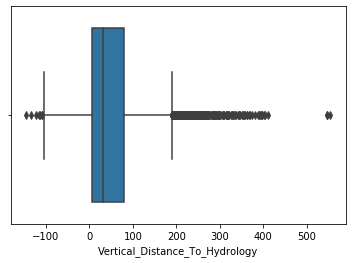

In [15]:
sns.boxplot(data.Vertical_Distance_To_Hydrology)
#There is outlier

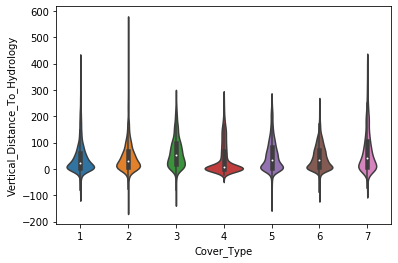

In [16]:
sns.violinplot(x = data['Cover_Type'], y = data.Vertical_Distance_To_Hydrology)

In [17]:
data['Distance_To_Hydrology'] = np.sqrt(data.Horizontal_Distance_To_Hydrology ** 2 + 
                                       data.Vertical_Distance_To_Hydrology ** 2)

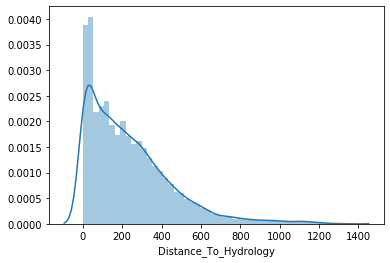

In [18]:
sns.distplot(data['Distance_To_Hydrology'])

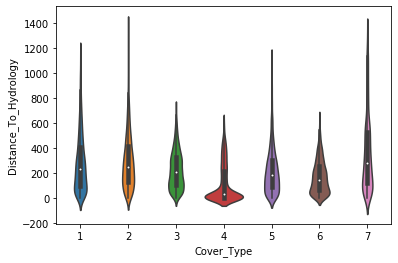

In [19]:
sns.violinplot(x = data['Cover_Type'], y = data.Distance_To_Hydrology)

### Hillshade_9am

In [38]:
data['Hillshade_9am'].describe()

count    15120.000000
mean       212.704299
std         30.561287
min          0.000000
25%        196.000000
50%        220.000000
75%        235.000000
max        254.000000
Name: Hillshade_9am, dtype: float64

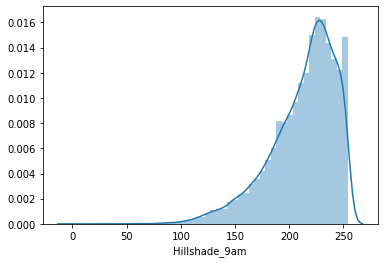

In [39]:
sns.distplot(data['Hillshade_9am'])

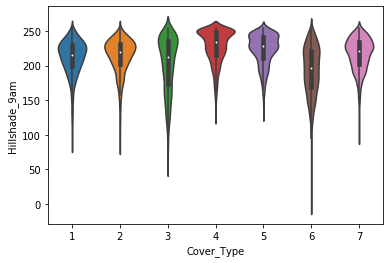

In [20]:
sns.violinplot(x = data['Cover_Type'], y = data['Hillshade_9am'])

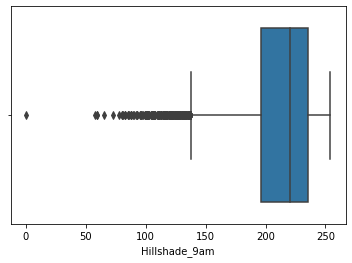

In [21]:
sns.boxplot(data.Hillshade_9am)
#Outlier

#### Hillshade_Noon

In [41]:
data.Hillshade_Noon.describe()

count    15120.000000
mean       218.965608
std         22.801966
min         99.000000
25%        207.000000
50%        223.000000
75%        235.000000
max        254.000000
Name: Hillshade_Noon, dtype: float64

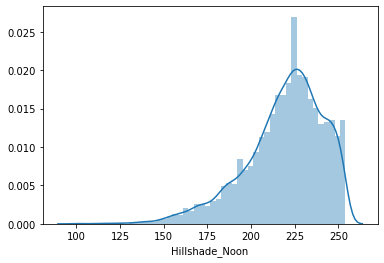

In [42]:
sns.distplot(data.Hillshade_Noon)

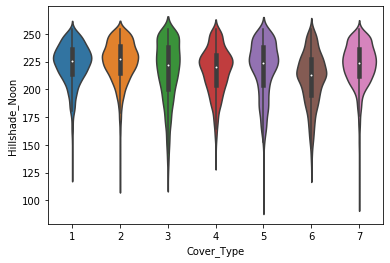

In [22]:
sns.violinplot(x = data['Cover_Type'], y = data['Hillshade_Noon'])

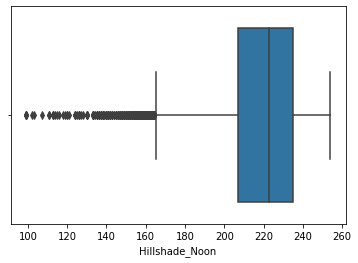

In [23]:
sns.boxplot(data.Hillshade_Noon)

### Hillshade_3pm

In [43]:
data.Hillshade_3pm.describe()

count    15120.000000
mean       135.091997
std         45.895189
min          0.000000
25%        106.000000
50%        138.000000
75%        167.000000
max        248.000000
Name: Hillshade_3pm, dtype: float64

-0.34082723258478564


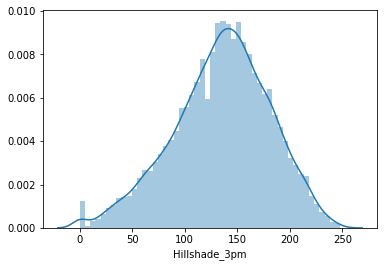

In [45]:
sns.distplot(data.Hillshade_3pm)
#print(data.Hillshade_3pm.skew())

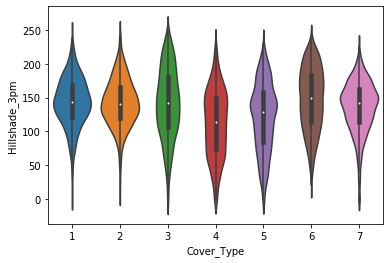

In [24]:
sns.violinplot(x = data['Cover_Type'], y = data['Hillshade_3pm'])

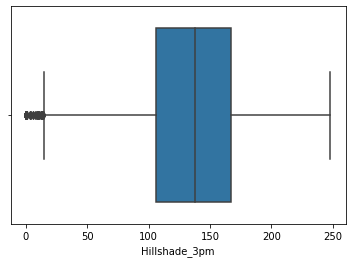

In [25]:
sns.boxplot(data.Hillshade_3pm)

### Horizontal_Distance_To_Fire_Points

In [26]:
data.Horizontal_Distance_To_Fire_Points.describe()

count    15120.000000
mean      1511.147288
std       1099.936493
min          0.000000
25%        730.000000
50%       1256.000000
75%       1988.250000
max       6993.000000
Name: Horizontal_Distance_To_Fire_Points, dtype: float64

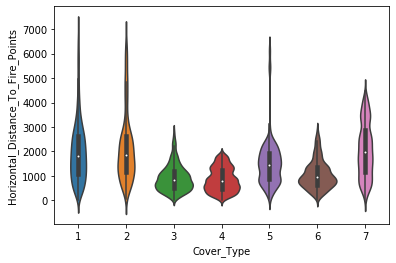

In [27]:
sns.violinplot(x = data['Cover_Type'], y = data.Horizontal_Distance_To_Fire_Points)

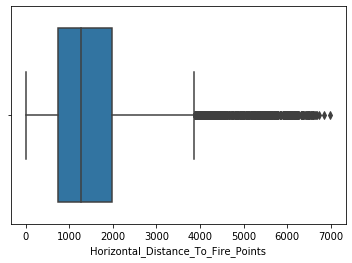

In [28]:
sns.boxplot(data.Horizontal_Distance_To_Fire_Points)

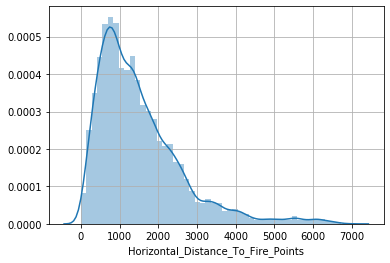

In [29]:
sns.distplot(data.Horizontal_Distance_To_Fire_Points)
plt.grid()

### Wilderness_Area

In [50]:
#Combing all wilderness_area columns into one column


In [51]:
def extract_wilderness(row):
    for i in range(1, 5):
        column_name = 'Wilderness_Area'+str(i)
        if row[column_name] == 1:
            return column_name

In [54]:
data['Wilderness_Area'] = data.apply(extract_wilderness, axis = 1)


In [59]:
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Distance_To_Hydrology,Wilderness_Area,Soil_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,5,258.000000,Wilderness_Area1,Soil_Type29
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,5,212.084889,Wilderness_Area1,Soil_Type29
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,2,275.769832,Wilderness_Area1,Soil_Type12
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,2,269.235956,Wilderness_Area1,Soil_Type30
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,5,153.003268,Wilderness_Area1,Soil_Type29


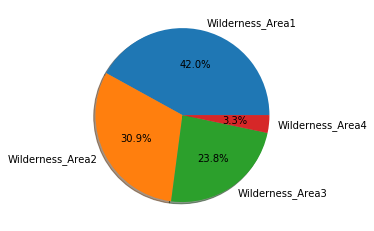

In [135]:
fig = plt.pie(data['Wilderness_Area'].value_counts(), 
        labels = ['Wilderness_Area1', 'Wilderness_Area2','Wilderness_Area3', 'Wilderness_Area4'], 
        autopct='%1.1f%%', shadow = True)


In [137]:
fig = px.histogram(data.sort_values(['Cover_Type', 'Wilderness_Area']),
                       x = "Wilderness_Area", color = "Cover_Type", barmode = "group",
                       height = 400, width = 800)
fig.show()
# We can see that some wilderness areas only have certain forest cover types.
# None of the wilderness areas have ALL forest cover types.

### Soil_Type

In [55]:
#Combing all soil_type columns into one column

In [56]:
def extract_soil(row):
    for i in range(1, 41):
        column_name = 'Soil_Type'+str(i)
        if row[column_name] == 1:
            return column_name

In [57]:
data['Soil_Type'] = data.apply(extract_soil, axis = 1)

In [138]:
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Distance_To_Hydrology,Wilderness_Area,Soil_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,5,258.000000,Wilderness_Area1,Soil_Type29
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,5,212.084889,Wilderness_Area1,Soil_Type29
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,2,275.769832,Wilderness_Area1,Soil_Type12
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,2,269.235956,Wilderness_Area1,Soil_Type30
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,5,153.003268,Wilderness_Area1,Soil_Type29


In [141]:
fig = px.histogram(data.sort_values(['Cover_Type', 'Soil_Type']), 
                   x = 'Soil_Type', color = 'Cover_Type', height = 400, width = 850)
fig.show()

In [149]:
soil_type_percent = pd.DataFrame((data['Soil_Type'].value_counts())/(data['Soil_Type'].value_counts().sum()))
soil_type_percent.columns = ['Percent']
soil_type_percent.sort_values('Percent', ascending = False)
# We have a lot of Soil Type 10 and 29

,Percent
Soil_Type10,0.141667
Soil_Type29,0.085384
Soil_Type3,0.063624
Soil_Type4,0.055754
Soil_Type23,0.050066
Soil_Type38,0.048148
Soil_Type30,0.047950
Soil_Type32,0.045635
Soil_Type39,0.043452
Soil_Type6,0.042989


In [152]:
fig = px.histogram(data.sort_values(['Wilderness_Area']), 
                   x = 'Soil_Type', color = 'Wilderness_Area', height = 400, width = 850)
fig.show()

### Cover_Type

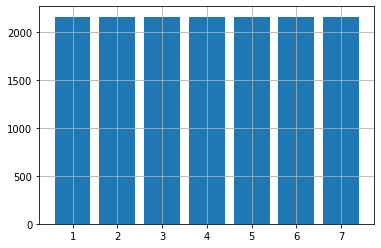

In [30]:
#Count of each cover type
x = data['Cover_Type'].value_counts().index.tolist()
y = data['Cover_Type'].value_counts().values.tolist()
plt.bar(x, y)
plt.grid()


# Baseline Model